# Finance Data Project


In this data project we will focus on exploratory data analysis of stock prices.Keep in mind, this project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis.

___
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data


We need to get data using pandas datareader. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

___
** [This documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions.

** I use 'stooq' based on the above documentation.

     # Bank of America
     BAC = data.DataReader("BAC", 'stooq', start, end)

In [157]:
from pandas_datareader import data, wb
import datetime

In [158]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2022,10,1)

In [159]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [160]:
tickers = list(('BAC','C','GS','JPM','MS','WFC'))

In [161]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],keys=tickers, axis=1)

In [162]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [163]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

## EDA (Exploratory Data Analysis)

In [164]:
# max Close price for each bank's stock throughout the time period
bank_stocks.loc[slice(None),(slice(None),['Close'])].max()

Bank Ticker  Stock Info
BAC          Close          48.5388
C            Close         472.2140
GS           Close         413.4870
JPM          Close         168.0140
MS           Close         106.7870
WFC          Close          58.3375
dtype: float64

In [165]:
bank_stocks.head(2)

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  

[2 rows x 30 columns]

In [166]:
returns = pd.DataFrame()

In [167]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000


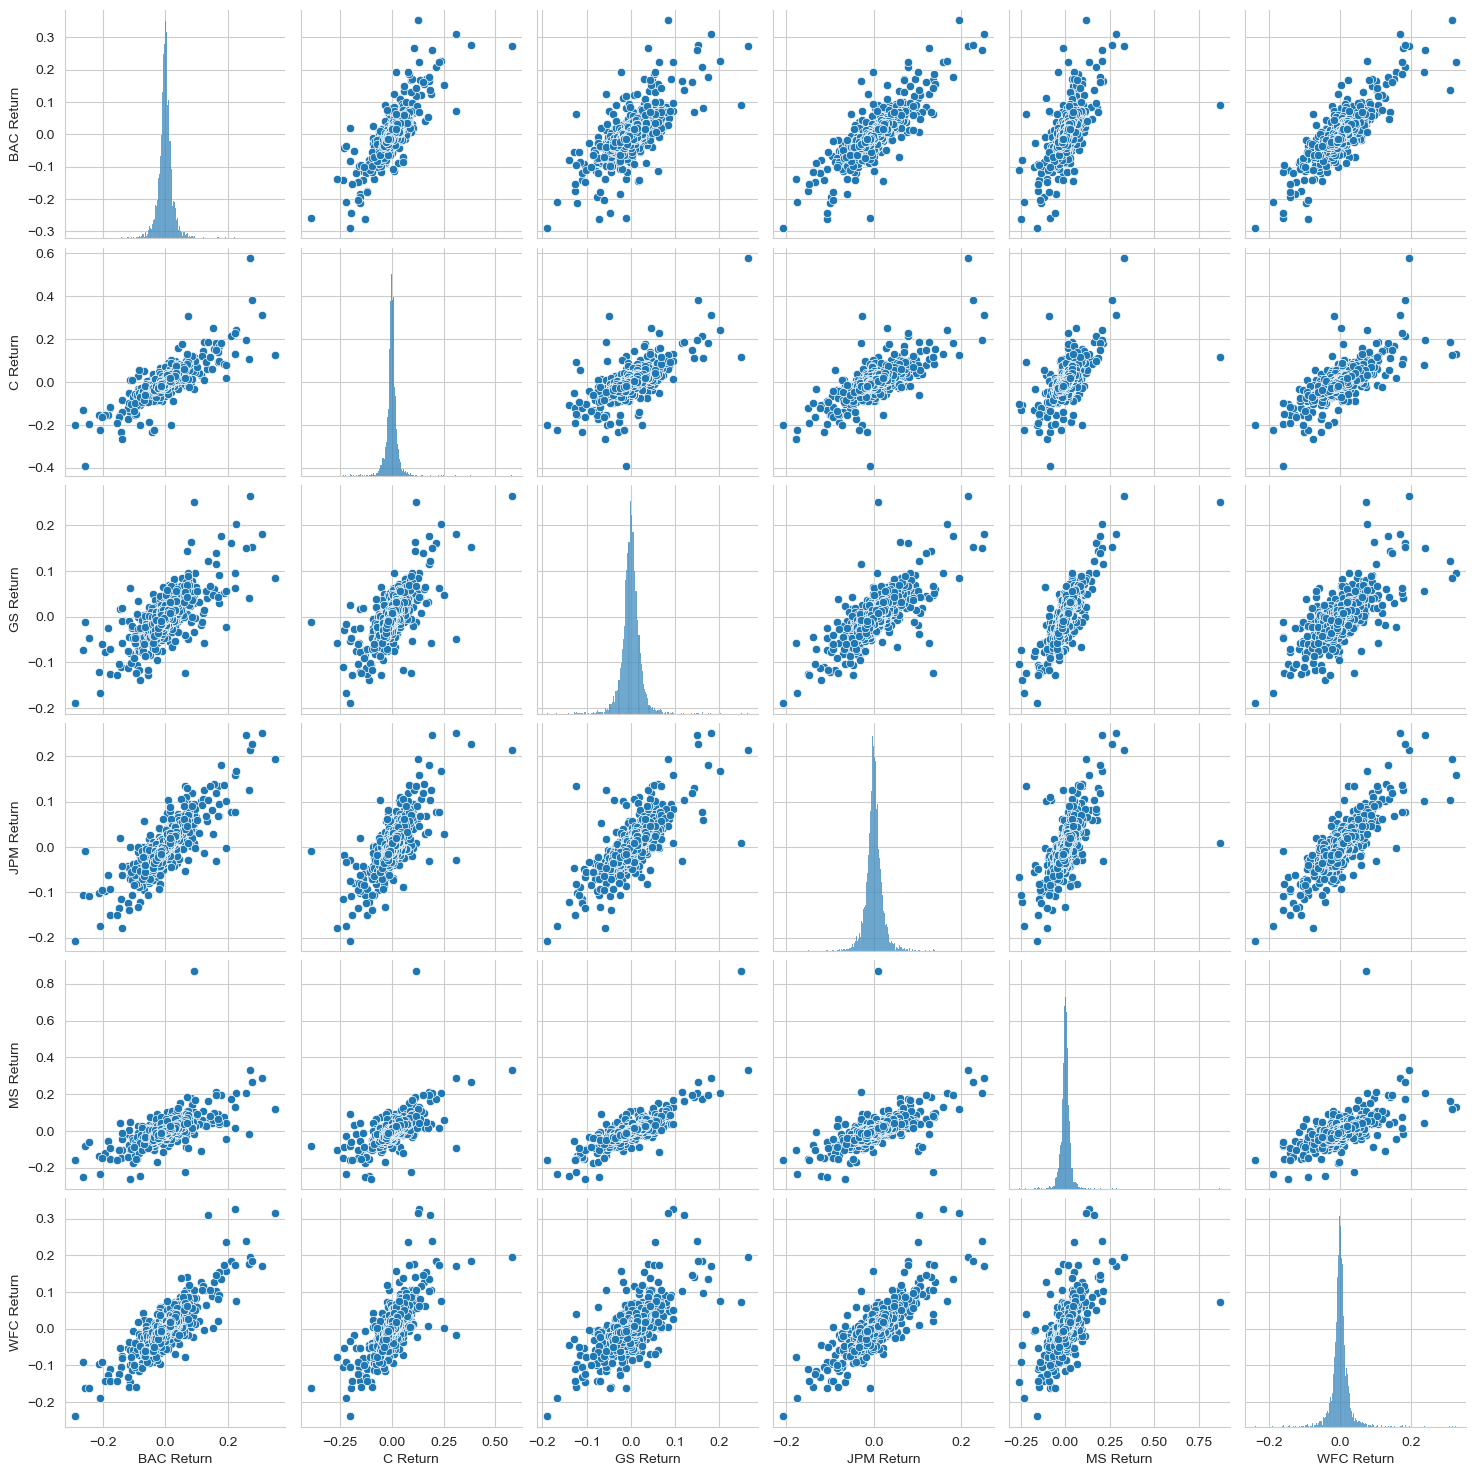

In [168]:
sns.pairplot(returns)

In [169]:
#Max,  Min date ans Std
returns_max_min_std = pd.concat([returns.idxmax(),returns.max(),
                                returns.idxmin(),returns.min(),
                                returns.std(),
                                returns.loc['2008-08-01':'2009-08-1'].std(),
                                returns.loc['2021-08-01':'2022-08-1'].std()],axis=1)

In [170]:
returns_max_min_std.columns=['date','max','date','min','std','std (2008-2009)','std(2021-2022)']
returns_max_min_std

,date,max,date,min,std,std (2008-2009),std(2021-2022)
BAC Return,2009-04-09,0.352689,2009-01-20,-0.289670,0.031275,0.093321,0.018942
C Return,2008-11-24,0.578367,2009-02-27,-0.390276,0.033062,0.101439,0.019457
GS Return,2008-11-24,0.264658,2009-01-20,-0.189581,0.023143,0.057654,0.018076
JPM Return,2009-01-21,0.251151,2009-01-20,-0.207414,0.024380,0.066974,0.016941
MS Return,2008-10-13,0.870167,2008-10-09,-0.258721,0.032061,0.095965,0.019190
WFC Return,2008-07-16,0.327413,2009-01-20,-0.238402,0.026959,0.076917,0.022227


<AxesSubplot:xlabel='C Return', ylabel='Count'>

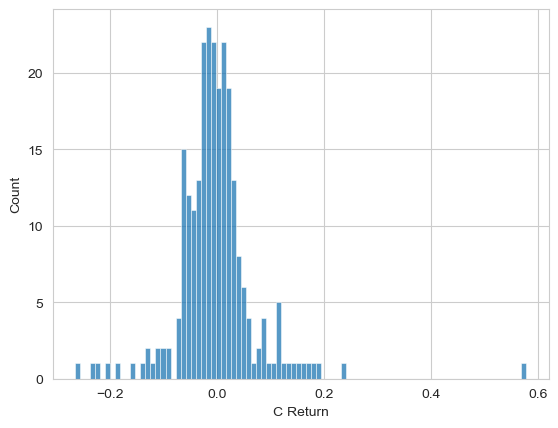

In [171]:
sns.histplot(returns.loc['2008-01-01':'2009-01-01']['C Return'],bins=90)

<AxesSubplot:xlabel='C Return', ylabel='Count'>

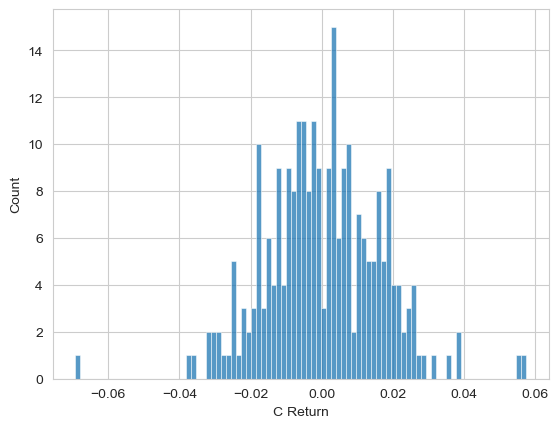

In [172]:
sns.histplot(returns.loc['2021-01-01':'2022-01-01']['C Return'],bins=90)

In [173]:
returns.loc['2008-01-01':'2009-01-01']['BAC Return']
#returns.loc['2008-08-01':'2009-08-1']

Date
2008-01-02   -0.016999
2008-01-03   -0.006387
2008-01-04   -0.011148
2008-01-07    0.001319
2008-01-08   -0.037341
                ...   
2008-12-24    0.061426
2008-12-26   -0.012503
2008-12-29   -0.031441
2008-12-30    0.023534
2008-12-31    0.063084
Name: BAC Return, Length: 253, dtype: float64

<AxesSubplot:xlabel='Date'>

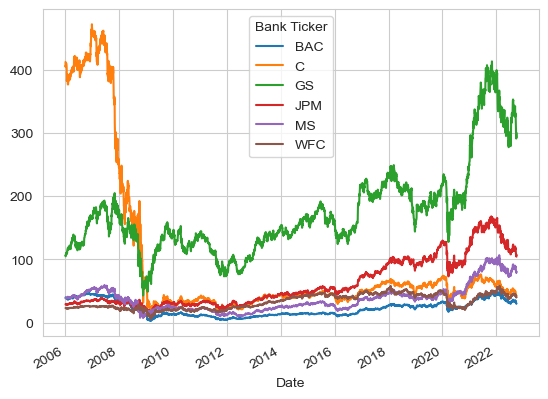

In [174]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

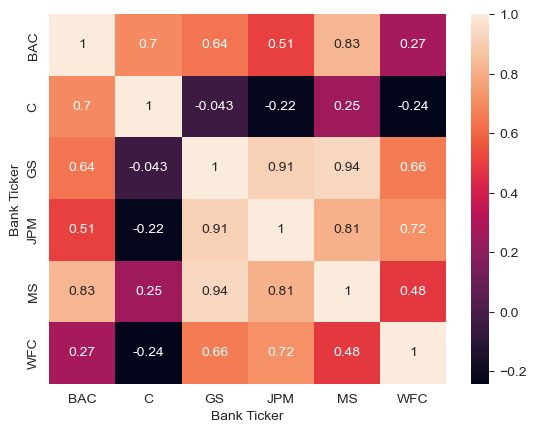

In [175]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

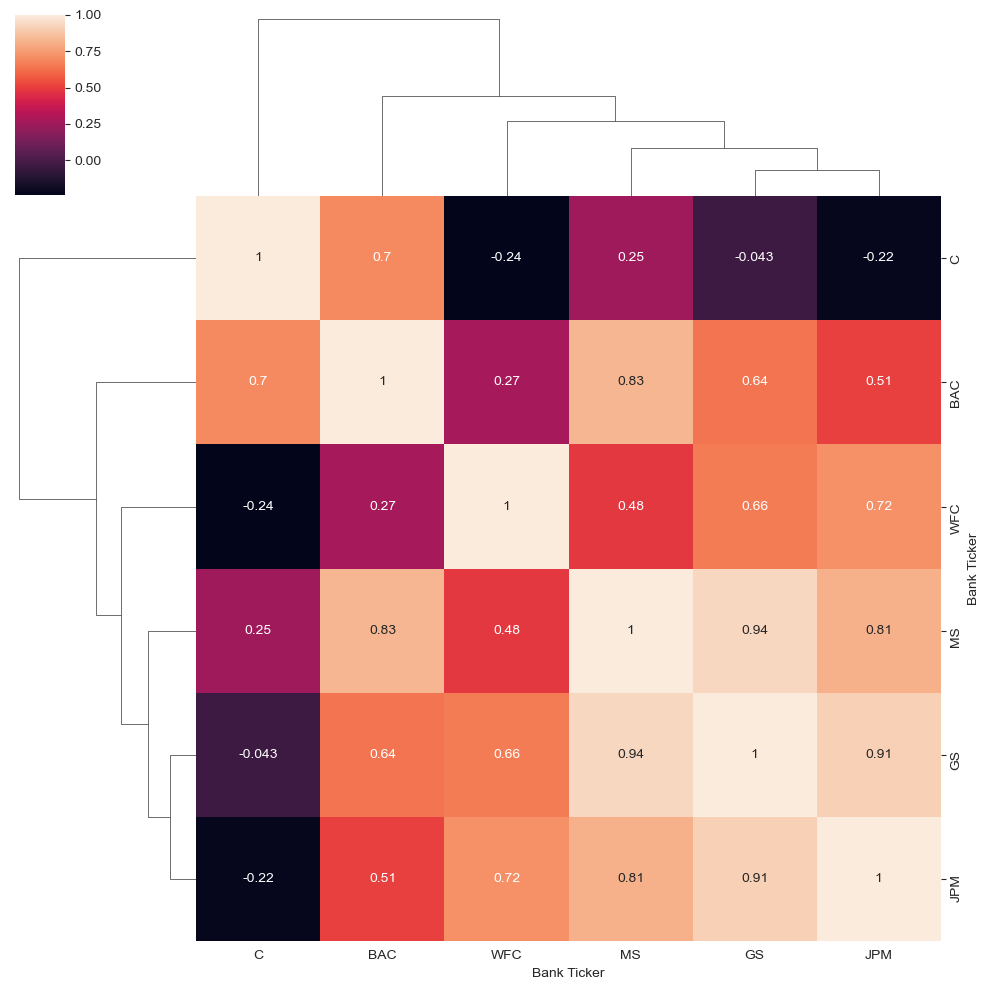

In [176]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)